In [20]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

def create_tuple(response):
    response_data = response.json()
    response_datum = response_data[0]
    response_target = response_datum['target']
    response_datapoints = response_datum['datapoints']
    tuple_array = [tuple(x) for x in response_datapoints]
    npa = np.array(tuple_array, dtype=[
        ('value', np.double), ('ts', 'datetime64[ms]')])
    return npa

def query(target, server, start, end):
  url = "https://ypsu0n34jc.execute-api.us-east-1.amazonaws.com/dev/query" #WebCTRL
  data = {
      "range": {
        "from": start,
        "to": end,
      },
      "targets": [
        {
          "payload": {
            "schema": server,
            "additional": [
                    "noagg",
                ]
          },
          "target": target
        }
      ],
    }
  request = requests.post(url, json=data)
  print(request)
  # print(request.json())
  return create_tuple(request)


def query_to_list(point, server, start, end):
    master = query(point, server, start, end)

    list = pd.Series(data=[i[0] for i in master], index=[i[1] for i in master])
    # print("\n", point, "\n", list)

    list = list[~list.index.duplicated()]
    # print("\n", point, " new\n", list)

    return list

<Response [200]>
2024-01-15 05:00:00    305.73
2024-01-15 05:05:00    305.73
2024-01-15 05:10:00    305.73
2024-01-15 05:15:00    305.73
2024-01-15 05:20:00    305.73
                        ...  
2024-03-06 12:35:00    310.62
2024-03-06 12:40:00    310.62
2024-03-06 12:45:00    310.62
2024-03-06 12:50:00    310.62
2024-03-06 12:55:00    310.62
Length: 14783, dtype: float64


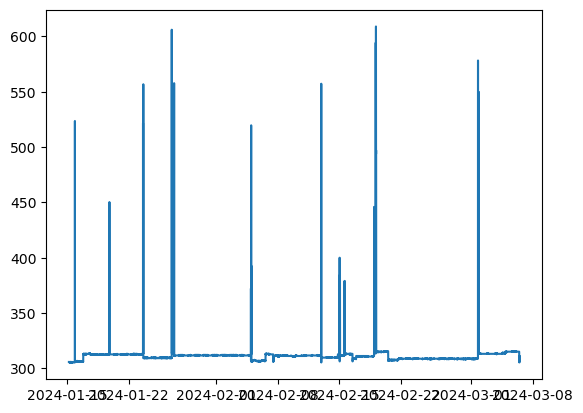

In [29]:
# Weill Test

data = query_to_list(point="#2-40/hev_flow_fbk", server="weill_main", start=str(datetime(2024, 1, 15)), end=str(datetime.now()))
print(data)
plt.plot(data)

In [ ]:
# Gates G01

query_to_list(point="#g01_vav-g-1/occ1", server="gates_main", start=str(datetime(2023, 1, 15)), end=str(datetime.now()))

In [ ]:
# Phillips 101

query_to_list(point="#phillips_lecture_hall_101/occ1", server="duffield_main", start=str(datetime(2023, 1, 15)), end=str(datetime.now()))